<a href="https://colab.research.google.com/github/Zeeshan00789/Airline-Passenger-Referral-Prediction/blob/main/Airline_Passenger_Referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.

Feature descriptions briefly as follows:
airline: Name of the airline.

overall: Overall point is given to the trip between 1 to 10.

author: Author of the trip

reviewdate: Date of the Review customer review: Review of the customers in free text format

aircraft: Type of the aircraft

travellertype: Type of traveler (e.g. business, leisure)

cabin: Cabin at the flight date flown: Flight 

seatcomfort: Rated between 1-5

cabin service: Rated between 1-5

foodbev: Rated between 1-5 entertainment: Rated between 1-5

groundservice: Rated between 1-5

valueformoney: Rated between 1-5

recommended: Binary, target variable.

In [30]:
#Importing all the library

import numpy as np
import pandas as pd
from numpy import math

#Importing libraries for Data Visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#Importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Reading the Dataset


In [31]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Importing the dataset
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Module 1/Capstone Project 3/data_airline_reviews.xlsx")

In [33]:
#First 5 columns of data
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#last 5 columns of data
df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [35]:
#shape of data
df.shape

(131895, 17)

In [36]:
#description of data
df.describe(include='all')

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
count,65947,64017.000000,65947,65947,65947,19718,39755,63303,39726,39633,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000,64440
unique,81,NaN,44069,3015,61172,2088,4,4,24549,63,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Spirit Airlines,NaN,Anders Pedersen,19th January 2015,On March 2/14 a friend and I were booked on an...,A320,Solo Leisure,Economy Class,Bangkok to Hong Kong,August 2015,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,2934,NaN,96,253,6,2157,14798,48558,35,1204,NaN,NaN,NaN,NaN,NaN,NaN,33894
mean,NaN,5.145430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962,NaN
std,NaN,3.477532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,NaN


In [37]:
#All the columns in data
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

#Featuring Engineering

In [38]:
#unique values
df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

In [39]:
#checking values of dependent column
df.value_counts('recommended')

recommended
no     33894
yes    30546
dtype: int64

##Dropping Unneccessary Columns

In [40]:
#Dropping unnecessary columns
df=df.drop(columns=['route' ,'author','review_date','customer_review','aircraft','date_flown'])

In [41]:
#checking duplicate values
df[df.duplicated()].count()

airline            19174
overall            18456
traveller_type     10004
cabin              17498
seat_comfort       15922
cabin_service      15943
food_bev           13011
entertainment      11305
ground_service      9912
value_for_money    17955
recommended        18159
dtype: int64

In [42]:
#Droping duplicate rows
df.drop_duplicates(inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46774 entries, 0 to 131884
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          46773 non-null  object 
 1   overall          45561 non-null  float64
 2   traveller_type   29751 non-null  object 
 3   cabin            45805 non-null  object 
 4   seat_comfort     44759 non-null  float64
 5   cabin_service    44772 non-null  float64
 6   food_bev         39597 non-null  float64
 7   entertainment    32888 non-null  float64
 8   ground_service   29446 non-null  float64
 9   value_for_money  46020 non-null  float64
 10  recommended      46281 non-null  object 
dtypes: float64(7), object(4)
memory usage: 4.3+ MB


##Null values imputation

In [44]:
# droping the rows which have all values as NaN
df.dropna(how='all',inplace=True)

In [45]:
#Checking the null value count for each column
df.isnull().sum()

airline                0
overall             1212
traveller_type     17022
cabin                968
seat_comfort        2014
cabin_service       2001
food_bev            7176
entertainment      13885
ground_service     17327
value_for_money      753
recommended          492
dtype: int64

In [46]:

#remove the rows where recommended value is null
df.drop(df[df['recommended'].isnull()].index, inplace = True)

In [47]:
df=df.reset_index()
df.head()

,index,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
2,5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
3,7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


In [48]:
#Checking the missing values
df.isnull().sum().sort_values(ascending=False)

ground_service     16835
traveller_type     16531
entertainment      13393
food_bev            6684
seat_comfort        1522
cabin_service       1509
overall             1197
cabin                477
value_for_money      261
index                  0
airline                0
recommended            0
dtype: int64

In [49]:
#percentage null values
percent_null=df.isnull().sum()/len(df)*100
percent_null=percent_null.sort_values(ascending=False)
percent_null

ground_service     36.375619
traveller_type     35.718761
entertainment      28.938441
food_bev           14.442212
seat_comfort        3.288607
cabin_service       3.260517
overall             2.586375
cabin               1.030661
value_for_money     0.563946
index               0.000000
airline             0.000000
recommended         0.000000
dtype: float64

Since large number of values are missing in columns of ground_service, traveller_type, entertainment, food_bev, etc so imputing values using Simple Imputer for catergorical as well as numerical columns.  

##Filling categorical columns

In [50]:
# Filling categorical null values with Simple Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df.traveller_type = imputer.fit_transform(df['traveller_type'].values.reshape(-1,1))[:,0]
df.cabin = imputer.fit_transform(df['cabin'].values.reshape(-1,1))[:,0]
df.head()

,index,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
2,5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
3,7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


##Filling Numerical Columns

In [53]:
# Filling numerical null values with Simple Imputer
imputer=SimpleImputer(missing_values=np.nan)
numerical_df = pd.DataFrame(imputer.fit_transform(numerical_df), columns=numerical_df.columns)
numerical_df

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
0,7.000000,4.000000,5.000000,4.000000,4.000000,2.000000,4.000000
1,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,2.000000
3,10.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...
46276,5.000000,3.076476,3.337331,2.966689,2.939887,2.843782,4.000000
46277,2.000000,3.076476,3.337331,2.966689,2.939887,2.843782,3.070296
46278,3.000000,3.076476,3.337331,2.966689,2.939887,2.843782,3.070296
46279,4.000000,3.076476,3.337331,2.966689,2.939887,2.843782,3.070296


In [54]:
#Replacing the old columns with new columns
df = df.drop(['index','overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'], axis=1)
df = pd.concat([df,numerical_df], axis=1)
df=round(df)
df = df.reindex(columns=['airline', 'overall','traveller_type', 'cabin', 'seat_comfort','cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'recommended'])
df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


In [55]:
#checking the null values
df.isnull().sum().sort_values(ascending=False)

airline            0
overall            0
traveller_type     0
cabin              0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

All missing values are filled using simple imputer

#Exploratory Data Analysis

##Outlier Detection

Text(0, 0.5, 'rating')

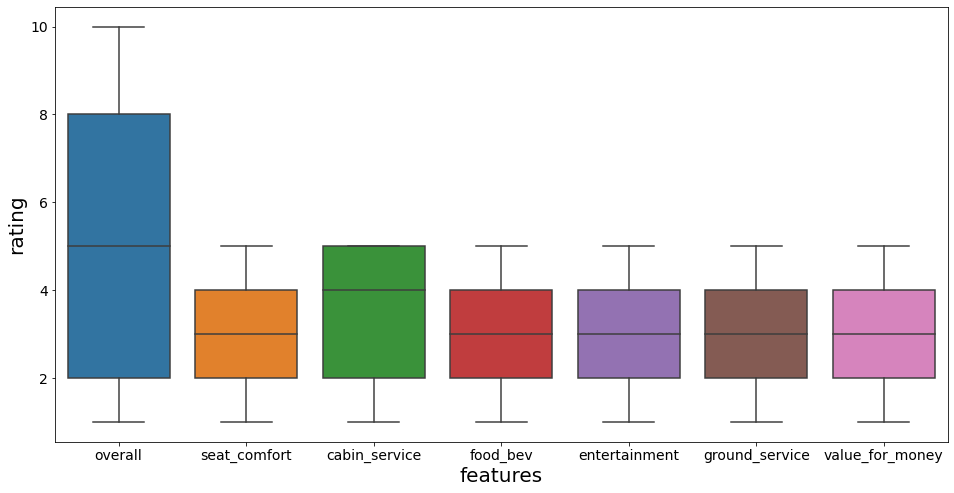

In [56]:

#figuresize
plt.figure(figsize =(16, 8))

#plotting boxplot 
sns.boxplot(data=df)

#Fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#Labels
plt.xlabel('features', fontsize= 20)
plt.ylabel('rating', fontsize= 20)


* Outliers are not present in data.

* The median of 'Overall' is 5, The median of other features are approximately 

##Dependent Feature Pie Chart

Text(0.5, 0, 'Recommended')

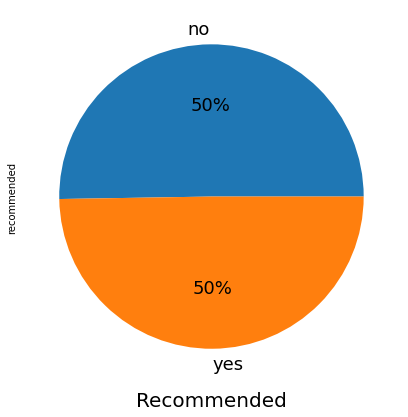

In [57]:
#plot of pie chart
df['recommended'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(7,7), textprops={'fontsize': 18})

#font size
plt.xticks(rotation=90,fontsize=14)                                                             
plt.yticks(fontsize=15)

#labelling
plt.xlabel('Recommended', fontsize= 20)

* recommended values of yes or no are 50-50%. 
* Dependent feature have balanced data.

##Travellers flight recommendation

Text(0, 0.5, 'count')

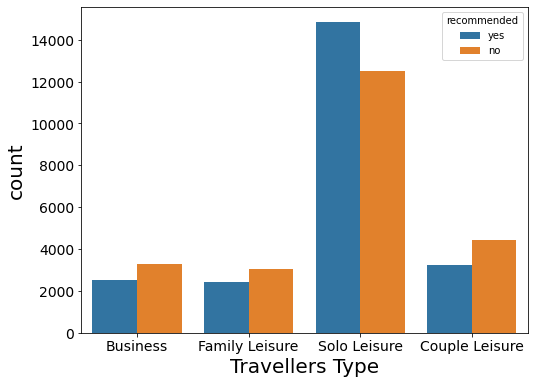

In [58]:
#figure size
plt.figure(figsize=(8,6))
sns.countplot(df['traveller_type'], hue=df['recommended'])

#Fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#Labels
plt.xlabel('Travellers Type', fontsize= 20)
plt.ylabel('count', fontsize= 20)

* Travellers from solo leisure are recommended yes more than others travellers
* Travellers from business and family leisure have less recommendation

##Classes of the people who recommended

Text(0, 0.5, 'Count')

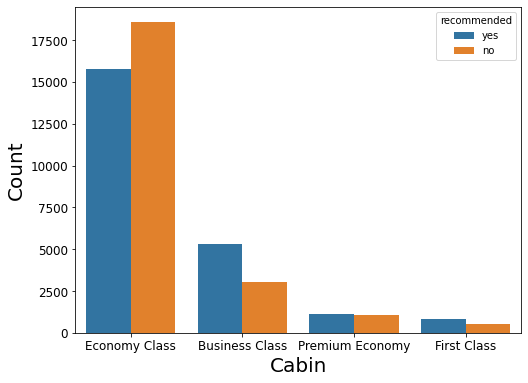

In [59]:
#setting the figure size and plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(df['cabin'], hue=df['recommended'])

#Fontsize
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Labels
plt.xlabel('Cabin', fontsize= 20)
plt.ylabel('Count', fontsize= 20)

* For Economy class, Number of 'NO' recommendations are more than 'YES' recommendations.
* For business class and first class, Number of 'YES' recommendations are more than 'NO' recommendations.

* For Premium economy class number of 'YES' recommendation and 'NO' recommendations are approximately equal.

#Travellers and their cabin

Text(0, 0.5, 'Count')

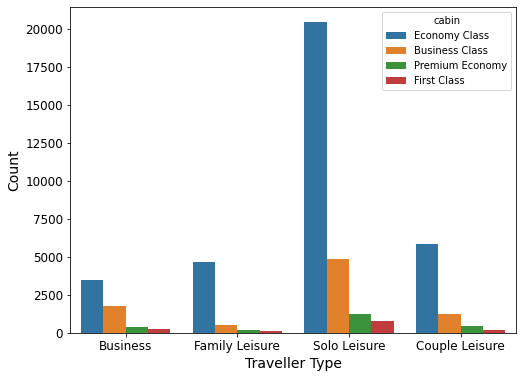

In [60]:
#figure size
plt.figure(figsize=(8,6))

#plot of traveller_type and cabin
sns.countplot(x='traveller_type', hue='cabin', data=df)

#Fontsize
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Labels
plt.xlabel('Traveller Type', fontsize= 14)
plt.ylabel('Count', fontsize= 14)

* All types of travellers mostly prefer economy class.
* Business class is less preferrable than economy class.
* First class is least preferable among all travellers

###Overall rating of flights

Text(0, 0.5, 'Overall Rating')

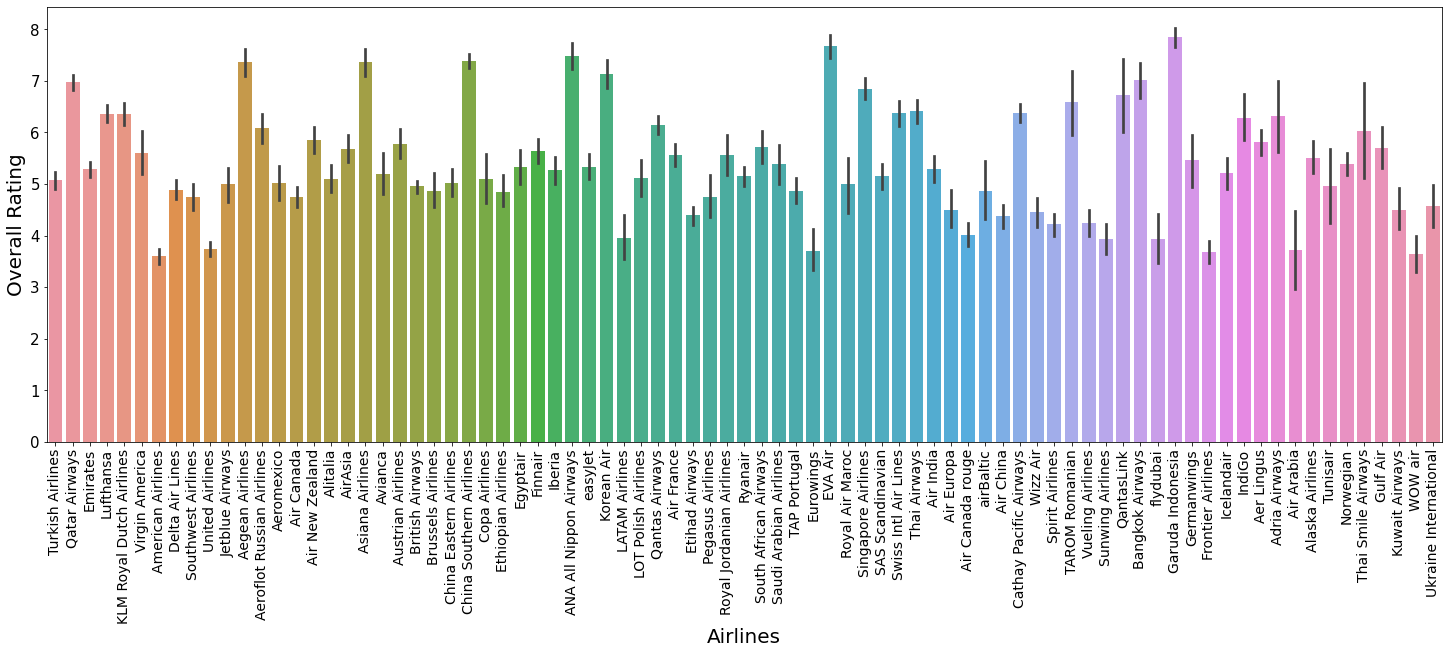

In [61]:
#figure size
plt.figure(figsize=(25,8))

#plot of airline
sns.barplot(x='airline', y='overall', data=df)

#Fontsize
plt.xticks(rotation=90,fontsize=14)                                                             
plt.yticks(fontsize=15)

#Labels
plt.xlabel('Airlines', fontsize= 20)
plt.ylabel('Overall Rating', fontsize= 20)

* The maximum overall ratings are received by Aegean airlines, Asiana airlines, China southern Airlines, ANA ALL Nippon Airways, EVA Air, Garuda Indonesia(rating is around 7.5-8).
*  The minimum overall rating is received by American airlines, United airlines, Eurowings, Frontier airlines, Air arabia and WoW air.

##Airline and their recommendations

Text(0, 0.5, 'Count')

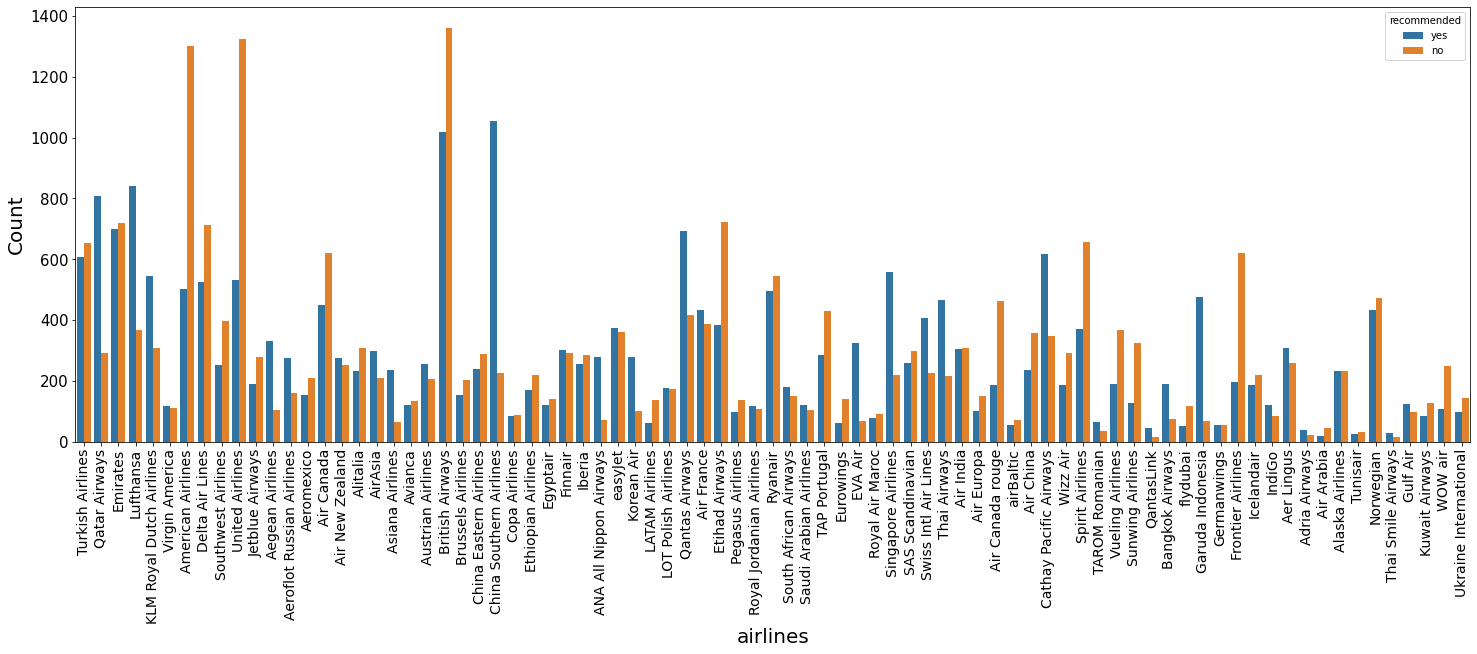

In [62]:
#figure size
plt.figure(figsize=(25,8))

#barplot
sns.countplot(x='airline', hue='recommended', data=df)

#font size
plt.xticks(rotation=90,fontsize=14)                                                             
plt.yticks(fontsize=15)

#labels
plt.xlabel('airlines', fontsize= 20)
plt.ylabel('Count', fontsize= 20)


1.   American airlines, United airlines and British airlines received maximum 'NO' recommendations.
2.   China southern airlines, Lufthansa, British airlines  and Qatar airways received maximum 'YES' recommendations. Thai smile, Tunisair, Air arabia, adria airways received minimum 'Yes' recommendations.



##Ratings and their recommendations

###Overall rating

Text(0, 0.5, 'Count')

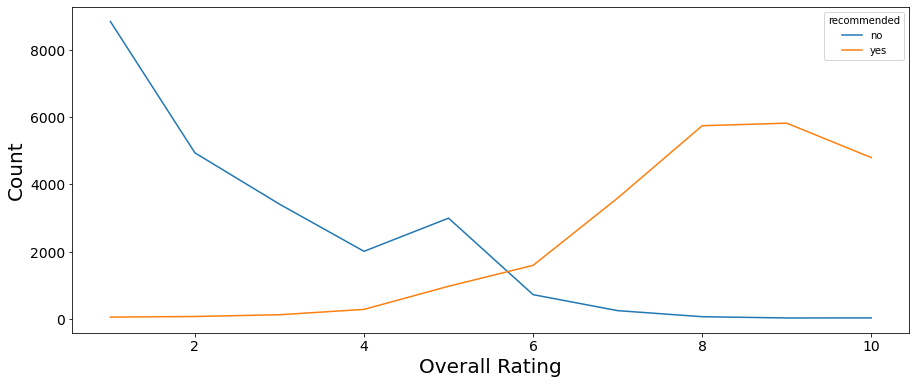

In [63]:
df.groupby(['overall'])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6))
#Fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#Labels
plt.xlabel('Overall Rating', fontsize= 20)
plt.ylabel('Count', fontsize= 20)

* As we can see here rating less than 4 given negative recommendation
* Rating greater than 6 given postive recommendation
* We can see as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases.


###Seat comfort

Text(0, 0.5, 'Count')

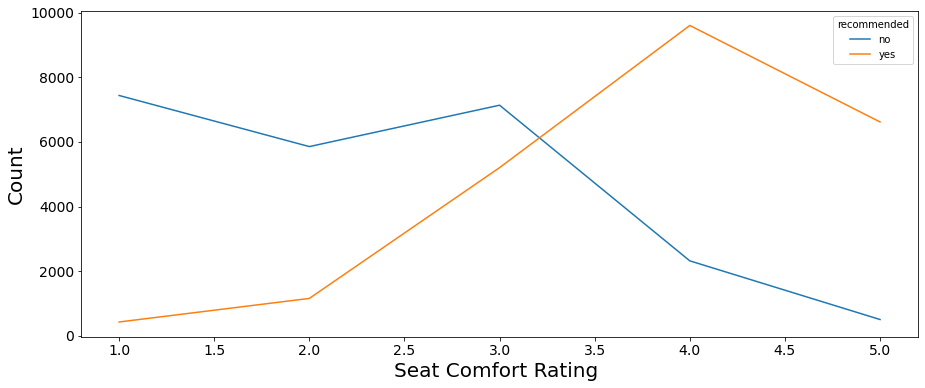

In [64]:
#Grouping columns
df.groupby(['seat_comfort'])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6))
#Fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#Labels
plt.xlabel('Seat Comfort Rating ', fontsize= 20)
plt.ylabel('Count', fontsize= 20)

* In seat comfort we can see as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in seat comfort rating 3.0 where we can see similar positive and negative recommendation.

* The Chances of getting postive recommendation is high when the seat comfort rating is more than 3.0

###Cabin Service

Text(0, 0.5, 'Count')

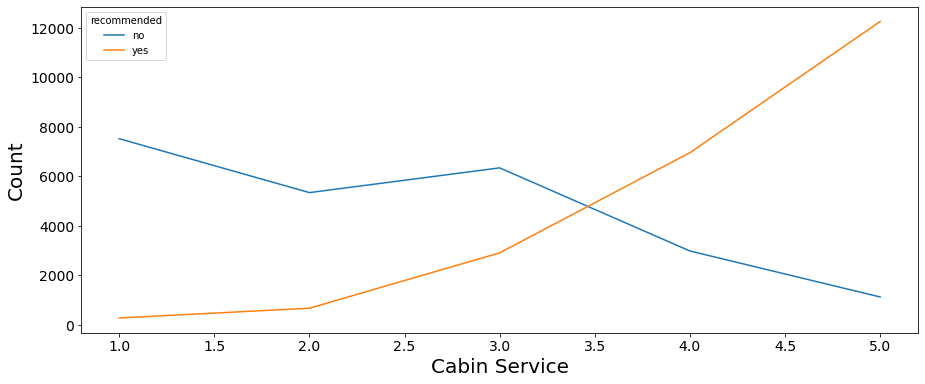

In [65]:
#grouping the values
df.groupby(['cabin_service'])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6))
#Fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#Labels
plt.xlabel('Cabin Service', fontsize= 20)
plt.ylabel('Count', fontsize= 20)

* In cabin service we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in cabin service rating 3.5 where we can see similar positive and negative recommendation.
* If the cabin service rating is greater than 3.5 then we can get 'yes' as recommendation by customer.

###Food beverages

Text(0, 0.5, 'Count')

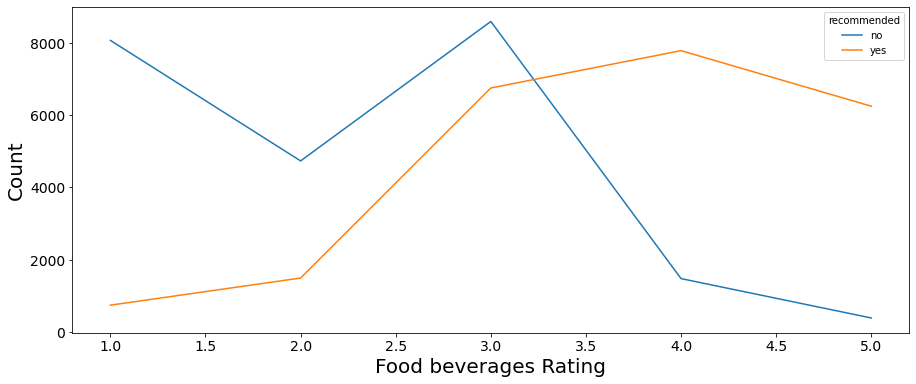

In [66]:
df.groupby(['food_bev'])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6))
#Fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#Labels
plt.xlabel('Food beverages Rating', fontsize= 20)
plt.ylabel('Count', fontsize= 20)

* If the rating is greater than 3.0 chances of getting 'yes' in recommedation is high.
* In food service we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in food service rating close to 3.0 where we can see similar positive and negative recommendation.

###Entertainment

Text(0, 0.5, 'Count')

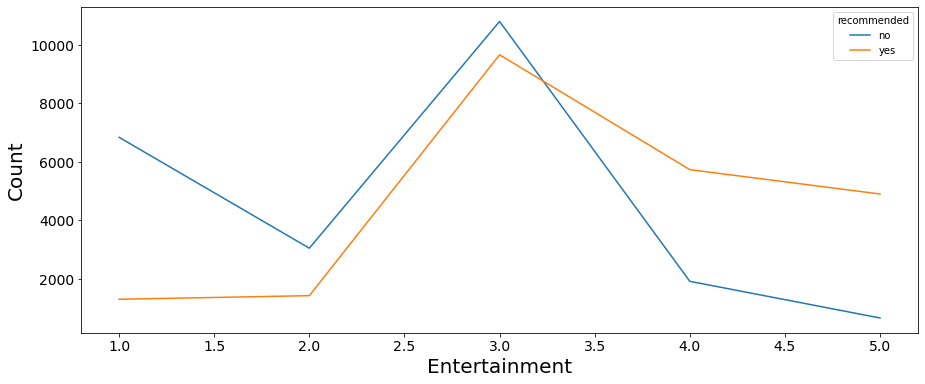

In [67]:
df.groupby(['entertainment'])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6))
#Fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#Labels
plt.xlabel('Entertainment', fontsize= 20)
plt.ylabel('Count', fontsize= 20)

* People giving rating 4 to 5 is less.
* Entertainment is not much affecting the recommendation
* We can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can see intersection in Entertainment service rating between 3.0 and 3.5 where we can see similar positive and negative recommendation.


###Ground Service

Text(0, 0.5, 'Count')

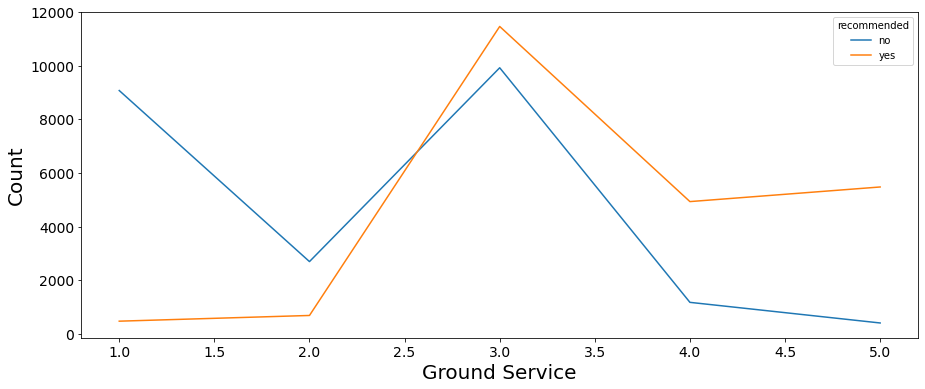

In [68]:
df.groupby(['ground_service'])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6))
#Fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#Labels
plt.xlabel('Ground Service', fontsize= 20)
plt.ylabel('Count', fontsize= 20)

* 'Yes' and 'No' both recommendations are rising and dropping in same way.
* Ground Service not much affect the recommendations.

###Value for money

Text(0, 0.5, 'Count')

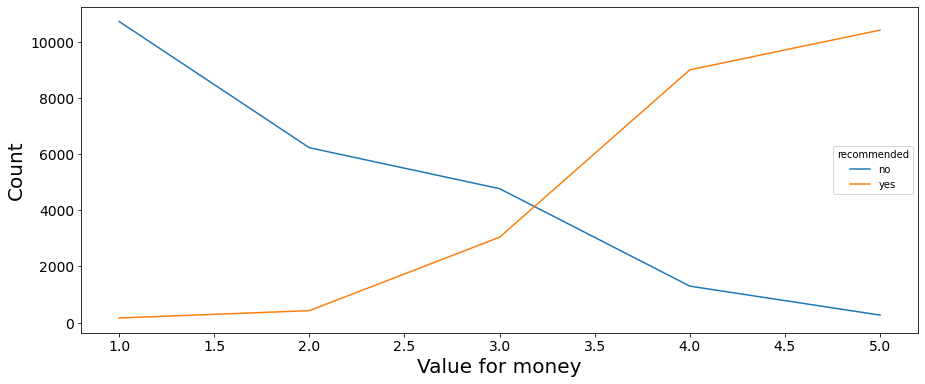

In [69]:
df.groupby(['value_for_money'])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6))
#Fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#Labels
plt.xlabel('Value for money', fontsize= 20)
plt.ylabel('Count', fontsize= 20)

* The chances of 'Yes' recommendation getting high when the value for money rating is more than 3.0.
* If rating is less than 3.0 then we can get 'No' as a recommendation


In [70]:
# replacing yes= 1 and no= 0 in recommended column
df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [71]:
#assigning variable to data
numerical_features=df.drop(columns='airline')

##Checking the frequency of values

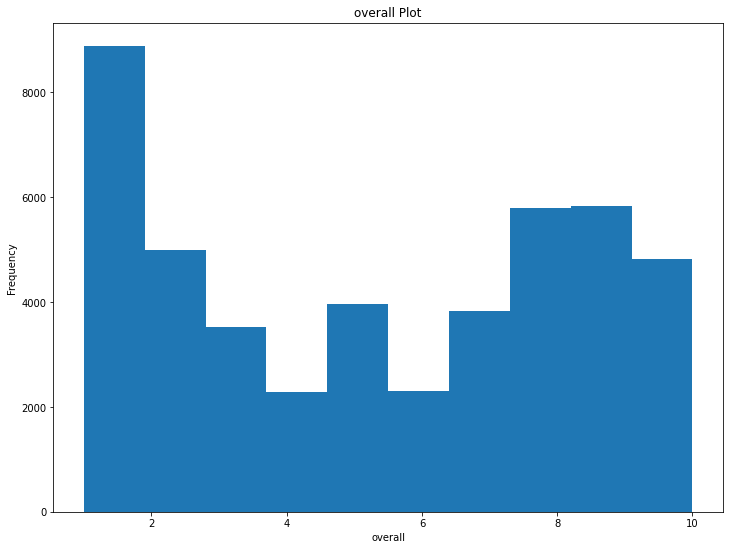

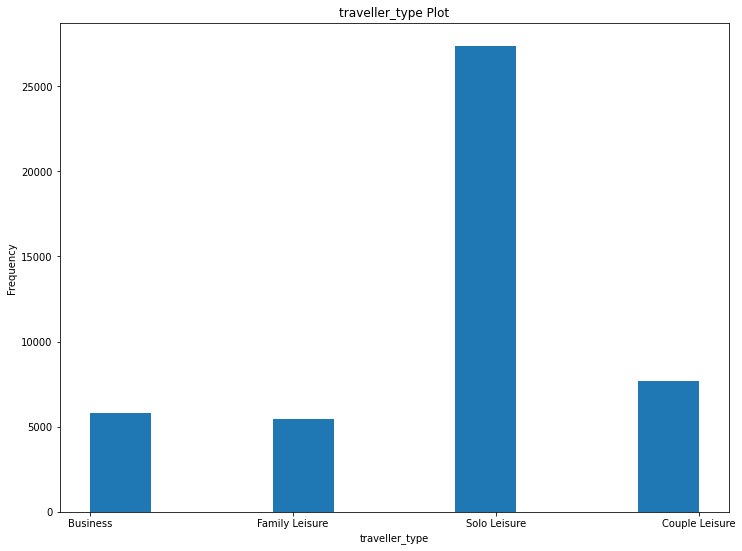

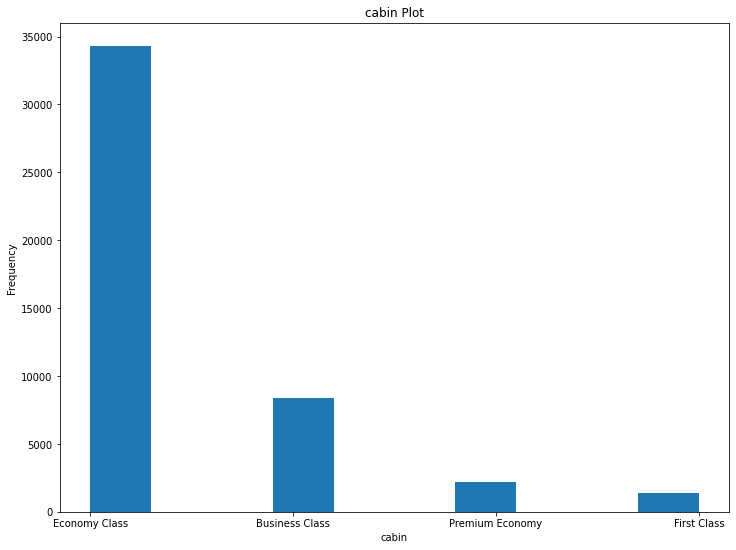

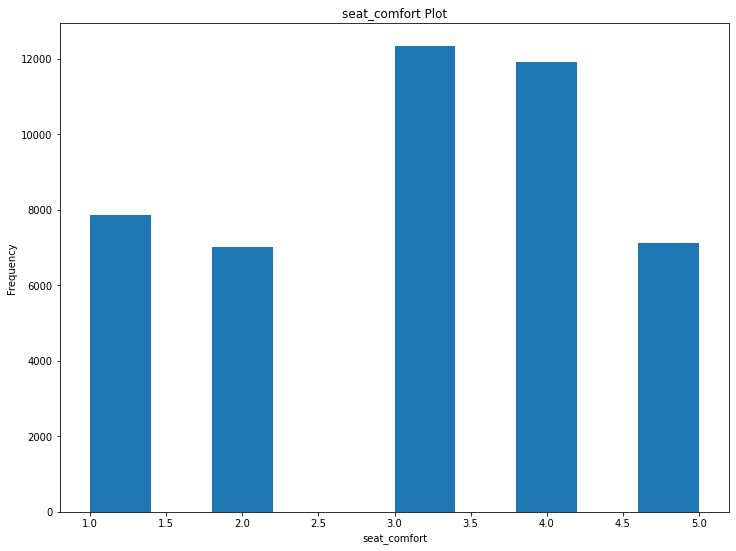

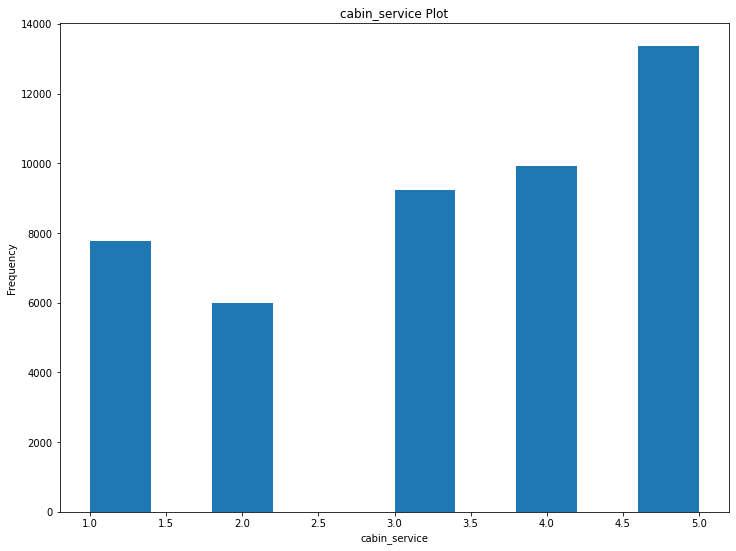

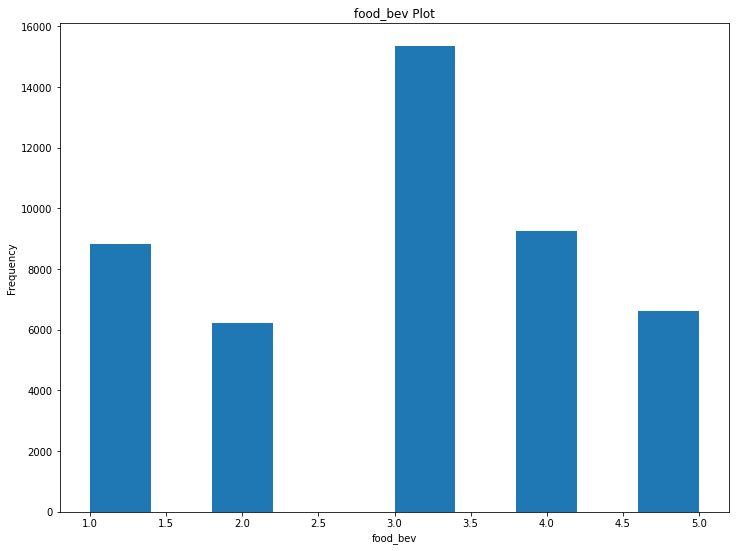

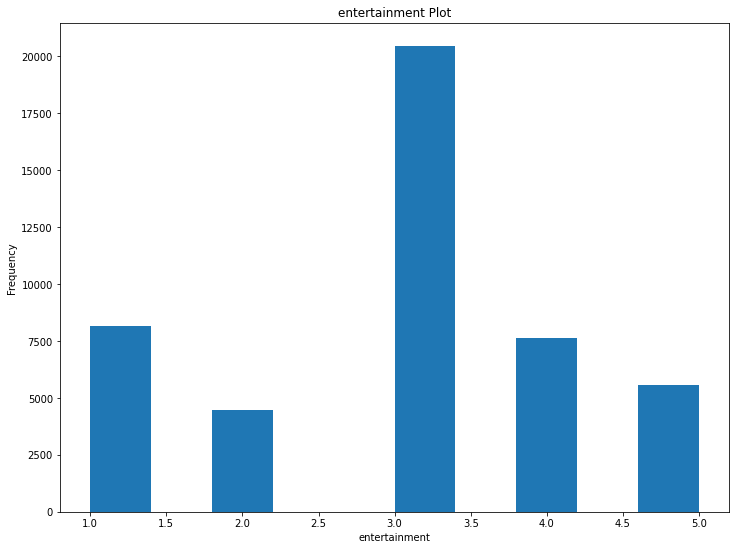

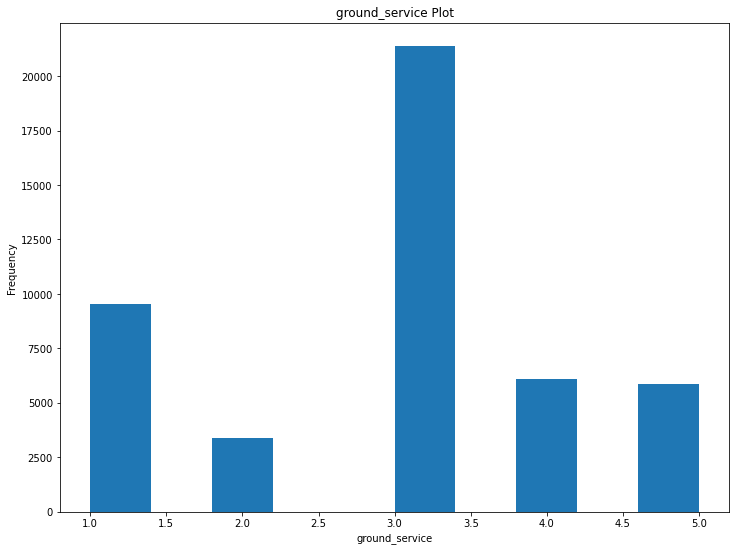

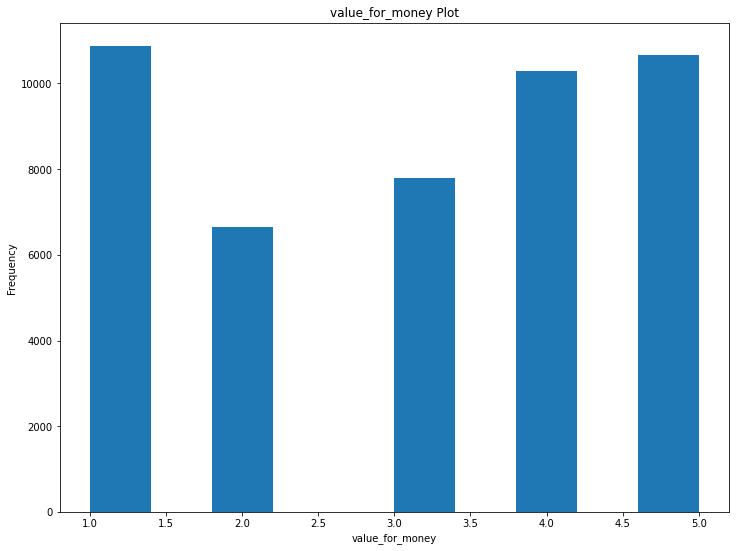

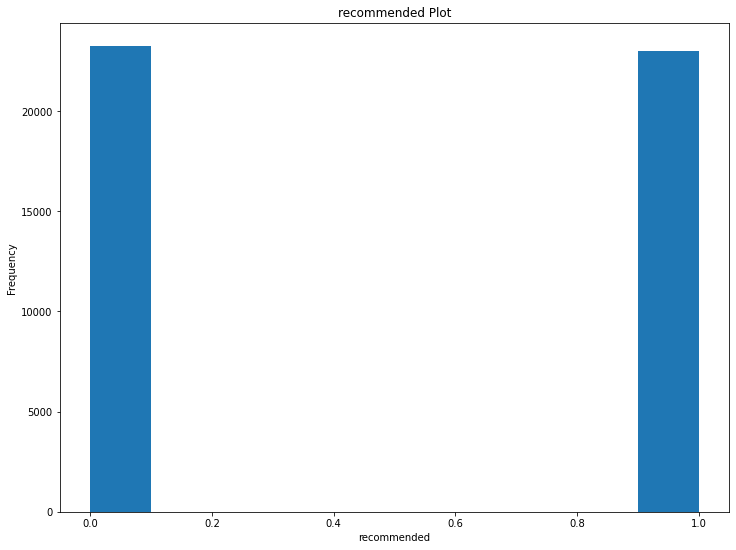

In [72]:
# plotting histogram for all numeric feature 
for i in numerical_features:
  #figure size
  plt.rcParams['figure.figsize']=(12,9)

  #histogram plot
  plt.hist(df[i], bins=10)

  #title of plot
  plt.title(i+" Plot")
  
  #label
  plt.xlabel(i)
  plt.ylabel("Frequency")
  plt.show()

<u>From above plot</u>
1. In comparison to other ratings, the __overall feature ratings of 1 to 2 occur more frequently__. Passengers are dissatisfied with service facilities such as food beverage, seat comfort, cabin service, and so on... As a result, passengers offer the worst overall ratings.

2. In __traveller_type__ Solo leisure have more values which indicates that solo travellers are more in flight. 

3. In __cabin frequency of economy class is higher__ than others and __first class has lower frequency.__

4. From __Seat comfort feature__, __rating of 1 is highest__ and __rating of 4 is the second highest__.

5. The __food bev feature__ ratings of __2,4 and 5__ are varies equally.Which means their __frequency are approximately equal__.

6. From  __cabin service feature__, We can say that __rating of 5 is highest__ and __rating of 1 is the second highest__.

7. The features of __both the entertainment & ground service__, __ratings of 3 is highest__ and __ratings of 1 is the second highest__.

8. From __value for money feature__, It clearly shows that **most of the passenger gives ratings of 1 as highest**. From this we can say that most of the **airline does not provide good service** to passenger.

9. Recommended has __same level__ of  frequency for 1 and 0

##Correlation plot

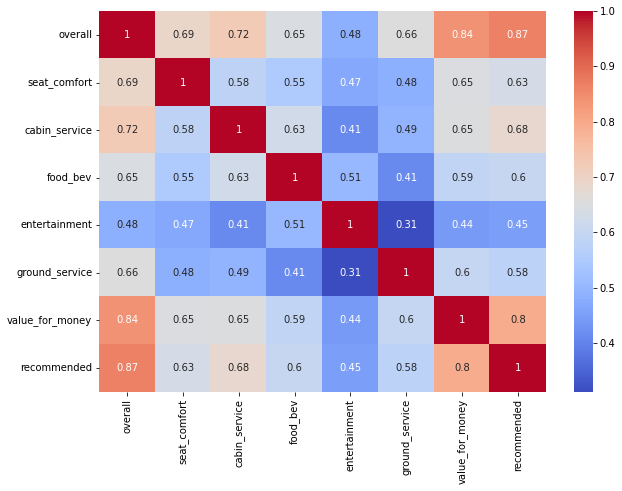

In [73]:

#setting the figure size and plotting the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')


1.  'Overall','food bev','cabin_service', 'value_for_money' etc are positively correlated with recommendation.

2.  'Overall' is most correlatetd with recommendation.

3. entertainment has 0.45 of correlation which is less than others

4.  overall and value for money have multicollinearity

#Encoding Techniques for Categorical Data

In [78]:
# categoriacal features to do one hot encoding
categorical_columns =['airline','cabin','traveller_type']
categorical_columns

['airline', 'cabin', 'traveller_type']

In [79]:
#getting numerical values of categorical column
df2= pd.get_dummies(df,columns=categorical_columns , drop_first = False)

In [80]:
df2.head()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,airline_ANA All Nippon Airways,airline_Adria Airways,...,airline_easyJet,airline_flydubai,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure
0,7.0,4.0,5.0,4.0,4.0,2.0,4.0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2.0,4.0,1.0,1.0,1.0,1.0,1.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3.0,1.0,4.0,1.0,3.0,1.0,2.0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,10.0,4.0,5.0,5.0,5.0,5.0,5.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [81]:
df2.columns

Index(['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended',
       'airline_ANA All Nippon Airways', 'airline_Adria Airways',
       'airline_Aegean Airlines', 'airline_Aer Lingus',
       'airline_Aeroflot Russian Airlines', 'airline_Aeromexico',
       'airline_Air Arabia', 'airline_Air Canada', 'airline_Air Canada rouge',
       'airline_Air China', 'airline_Air Europa', 'airline_Air France',
       'airline_Air India', 'airline_Air New Zealand', 'airline_AirAsia',
       'airline_Alaska Airlines', 'airline_Alitalia',
       'airline_American Airlines', 'airline_Asiana Airlines',
       'airline_Austrian Airlines', 'airline_Avianca',
       'airline_Bangkok Airways', 'airline_British Airways',
       'airline_Brussels Airlines', 'airline_Cathay Pacific Airways',
       'airline_China Eastern Airlines', 'airline_China Southern Airlines',
       'airline_Copa Airlines', 'airline_Delta Air Lines', 'airline_E

#Splitting the Data to Train and Test

In [82]:
#getting the independent variables
x = df2.drop('recommended', axis =1)

#getting the dependent variables
y= df2['recommended']

In [83]:
# Perform Train Test Split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size =0.2, random_state = 0)

###Training set = 80% 

###Test set = 20%

In [84]:
# Get shapes for Train and Test set
X_train.shape,X_test.shape

((37024, 96), (9257, 96))

# Models

#1. Logistic Regression

In [85]:
#fitting the logistic regression in training set
lg = LogisticRegression(fit_intercept=True, max_iter=10000)
lg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [86]:
# Get the model coefficients
lg.coef_

array([[ 1.01004846,  0.20724899,  0.37054362,  0.12523195,  0.13169478,
         0.2234441 ,  0.80246673,  0.21214243,  0.56850257,  0.37778978,
        -0.18741383, -0.10109497, -0.29846753,  0.14787072,  0.30198018,
        -0.64745414,  0.07800415,  0.60973685, -0.14463247, -0.01009657,
        -0.37455915,  0.18186459,  0.07124807, -0.26722373,  0.15300308,
        -0.36086316,  0.06729161,  0.11048805, -0.1333273 , -0.26149955,
        -0.0661007 , -0.39813356, -0.22949991, -0.07643856,  0.84143192,
        -0.1352201 ,  0.06380728, -0.3471383 ,  0.0446777 ,  0.04767376,
        -0.58914005,  0.1691809 , -0.5675415 , -0.17994201,  0.34158742,
         0.32879568, -0.04164007, -0.13177258, -0.30237408,  0.07638999,
        -0.81573454, -0.04460108, -0.42098448,  0.01265333, -0.22294287,
         0.41511372,  0.73372621, -0.36235274, -0.08321332,  0.15019833,
         0.69237176, -0.25486866,  0.12988323, -0.03866843, -0.01798329,
         0.16706103,  0.28823366,  0.12121693,  0.2

In [87]:
#intercept value
lg.intercept_

array([-11.18747027])

In [88]:
#train accuracy of regression model
print(f'Train score= {round(lg.score(X_train,y_train), 3)}')
#test accuracy of  regression model
print(f'Test score= {round(lg.score(X_test,y_test), 3)}')

Train score= 0.947
Test score= 0.945


In [89]:
#  test data
np.array (y_test )

array([0, 1, 1, ..., 1, 0, 0])

In [90]:
#predicted test data.
y_pred = lg.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [91]:
#evaluation metrics
print(metrics.classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4672
           1       0.95      0.94      0.94      4585

    accuracy                           0.95      9257
   macro avg       0.95      0.95      0.95      9257
weighted avg       0.95      0.95      0.95      9257



##ROC Curve of Logistic Regression

In [92]:
#roc_auc_score
y_pred_proba =lg.predict_proba(X_test)[::,1]
auc_score=roc_auc_score(y_test, y_pred_proba)
auc_score

0.9858330936944475

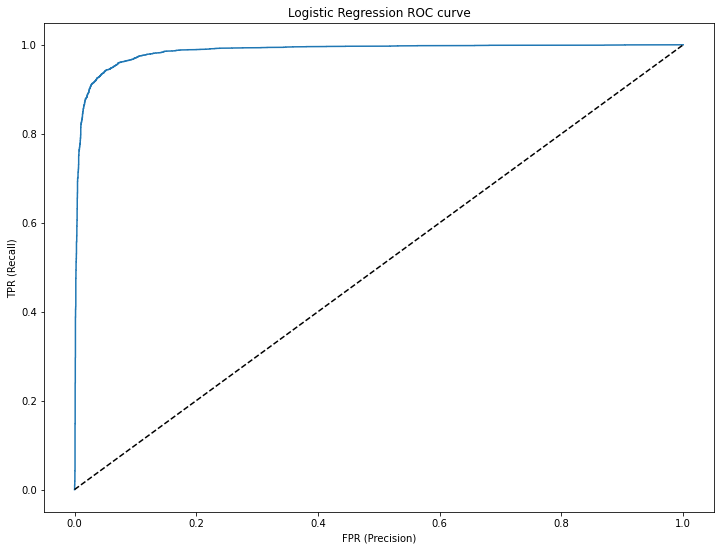

In [93]:
#plot of roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

#title of plot
plt.title('Logistic Regression ROC curve')

#label
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Evaluation Metrics of Logistic Regression

In [94]:
column = ['Model','Accuracy','Recall','Precision','f1-score','roc_auc_score']

#new dataframe for evaluation metric
evaluation_metrics_df= pd.DataFrame(columns = column)


In [95]:
#creating function for storing evaluation metrices
def evaluation_metric(model,y_test,y_pred,metric_df):
  '''
   Function for evaluation metric
  '''
  metric_df= metric_df.append({'Model': model,
                               'Train score':lg.score(X_train,y_train),
                               'Test score':lg.score(X_test,y_test),
                               'Accuracy':accuracy_score(y_test,y_pred),
                               'Recall':recall_score(y_test,y_pred),
                               'Precision':precision_score(y_test,y_pred),
                               'f1-score':f1_score(y_test,y_pred),
                               'roc_auc_score':roc_auc_score(y_test,y_pred_proba)
                               },ignore_index=True)
  return metric_df

In [96]:
#appending values in dataframe
evaluation_metrics_df=evaluation_metric('Logistic Regression', y_test, y_pred, evaluation_metrics_df)
evaluation_metrics_df

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score,Test score,Train score
0,Logistic Regression,0.945231,0.942639,0.946562,0.944596,0.985833,0.945231,0.947439


##Confusion Metrics of Logistic Regression

[[4428  244]
 [ 263 4322]]


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

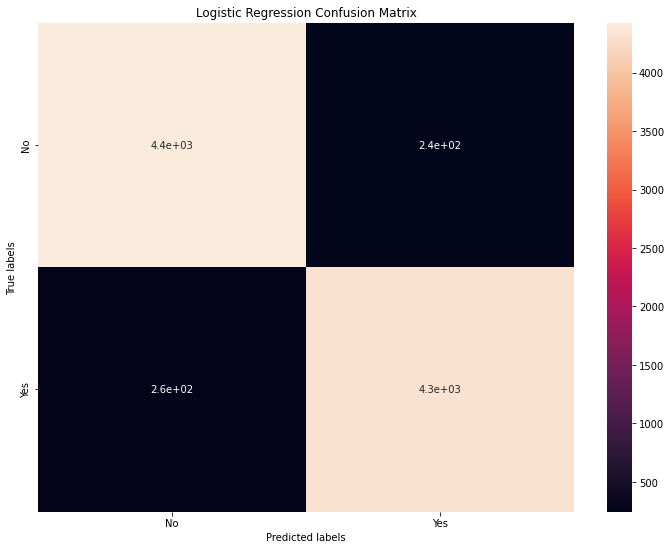

In [97]:
# Get the confusion matrix for both train and test

labels = ['No', 'Yes']
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

#title of plot
ax.set_title('Logistic Regression Confusion Matrix')

#labelling
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#2. Random Forest Classifier

In [98]:
#fitting the random forest in training set
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [99]:
#predicted test data.
y_pred = rf.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [100]:
#evaluation metrics
print(metrics.classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4672
           1       0.95      0.94      0.94      4585

    accuracy                           0.94      9257
   macro avg       0.94      0.94      0.94      9257
weighted avg       0.94      0.94      0.94      9257



##ROC Curve of Random Forest




In [101]:
#roc_auc_score
y_pred_proba =rf.predict_proba(X_test)[::,1]
auc_score=roc_auc_score(y_test,y_pred_proba)
auc_score

0.9839159670456074

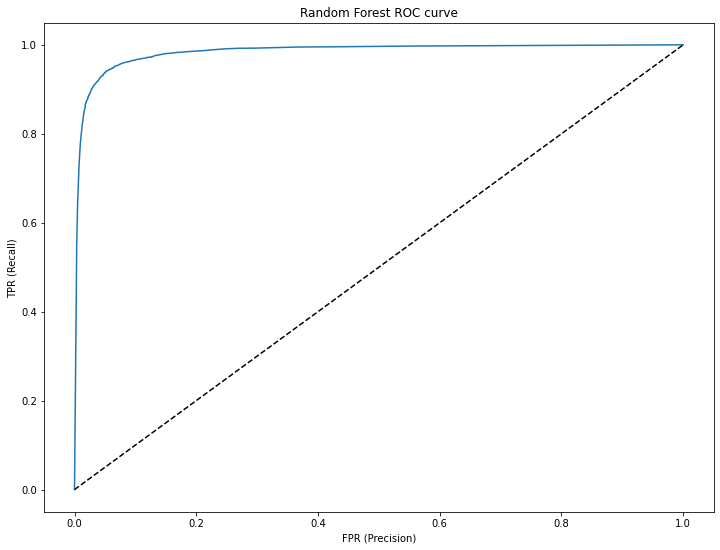

In [102]:
#plotting roc_auc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

#title of plot
plt.title('Random Forest ROC curve')

#labelling
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Evaluation Metrics of Random Forest

In [103]:
#appending values in evaluation metrics dataframe
evaluation_metrics_df=evaluation_metric('Random Forest Classifier', y_test, y_pred, evaluation_metrics_df)
evaluation_metrics_df

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score,Test score,Train score
0,Logistic Regression,0.945231,0.942639,0.946562,0.944596,0.985833,0.945231,0.947439
1,Random Forest Classifier,0.943502,0.935660,0.949535,0.942546,0.983916,0.945231,0.947439


##Confusion Metrics of Random Forest

[[4444  228]
 [ 295 4290]]


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

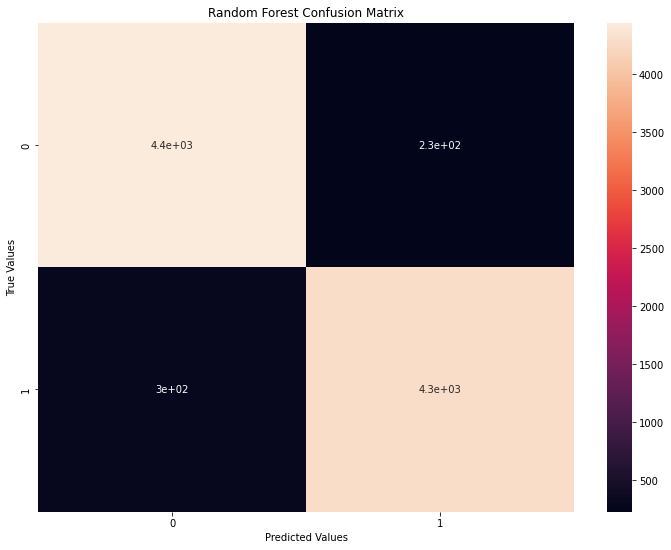

In [104]:
# Get the confusion matrix for both train and test
cm = confusion_matrix(y_test, y_pred)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values')

#title of plot
ax.set_title('Random Forest Confusion Matrix')

#Hyperparameter Tuning of Random Forest Classifier



In [105]:
#Hyperparametric Tuning to get best parameter for evaluation
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [6,8,10,12],
              'min_samples_split' : [10,50,100],
              'min_samples_leaf' : [30,40,50]}

In [106]:
#assigning grid search variable
rf_grid = GridSearchCV(estimator=rf,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

#Evaluating the optimal parameters
rf_grid.fit(X_train,y_train)
rf_grid.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.1s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.8s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.1s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.1s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.0s
[CV] END max_depth=6, min_sa

RandomForestClassifier(max_depth=12, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=50)

In [107]:
#getting best parameter from grid search
rf_grid.best_params_

{'max_depth': 12,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 50}

In [108]:
#assigning best param variable
rf_grid_best = rf_grid.best_estimator_
rf_grid_best

RandomForestClassifier(max_depth=12, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=50)

In [109]:
#predicting values
y_pred=rf_grid_best.predict(X_test)

In [110]:
#evaluation metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4672
           1       0.95      0.93      0.94      4585

    accuracy                           0.94      9257
   macro avg       0.94      0.94      0.94      9257
weighted avg       0.94      0.94      0.94      9257



In [111]:
#roc_auc_score
y_pred_proba =rf_grid_best.predict_proba(X_test)[::,1]

auc_score=roc_auc_score(y_test,y_pred_proba)
auc_score

0.9833913446169014

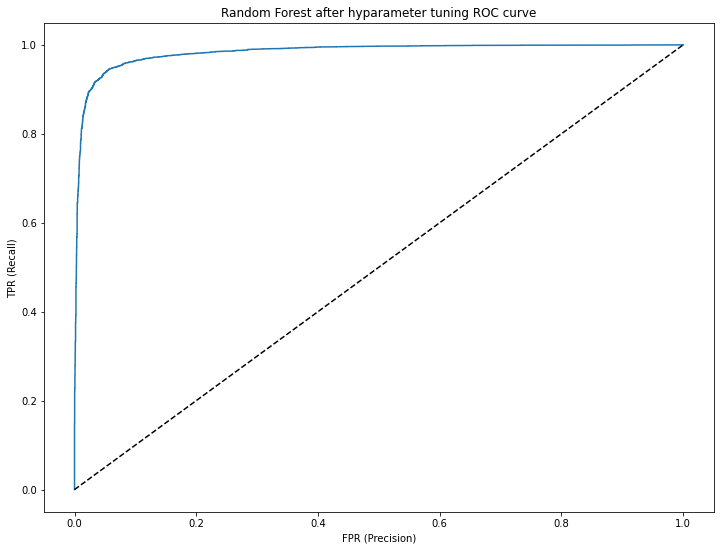

In [112]:
#plot of roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

#title of plot
plt.title('Random Forest after hyparameter tuning ROC curve')

#label
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

#plot
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Evaluation Metrics after Hyperparameter Tuning of Random Forest


In [113]:
## Evaluation Metrics of Random Forest
evaluation_metrics_df=evaluation_metric('Random Forest with GridSearchCV', y_test, y_pred, evaluation_metrics_df)
evaluation_metrics_df

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score,Test score,Train score
0,Logistic Regression,0.945231,0.942639,0.946562,0.944596,0.985833,0.945231,0.947439
1,Random Forest Classifier,0.943502,0.935660,0.949535,0.942546,0.983916,0.945231,0.947439
2,Random Forest with GridSearchCV,0.942530,0.931080,0.951839,0.941345,0.983391,0.945231,0.947439


##Confusion matrix after Hyperparameter Tuning of Random Forest

[[4456  216]
 [ 316 4269]]


Text(0.5, 1.0, 'Random Forest with hyperparameter tuning Confusion Matrix')

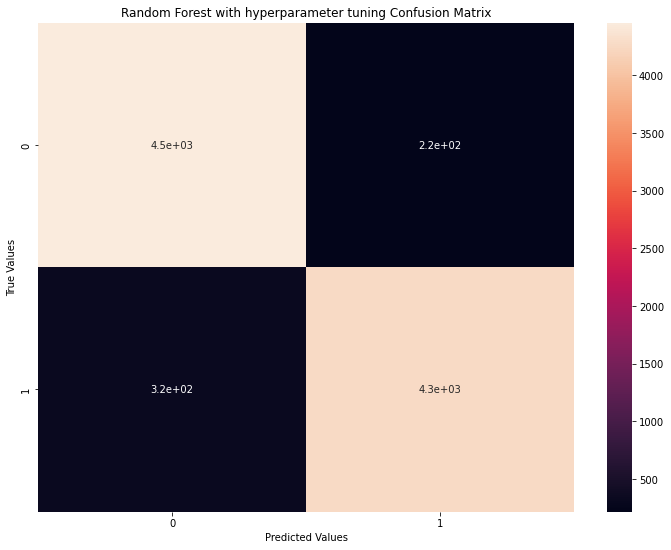

In [114]:
# Get the confusion matrix for both train and test
cm = confusion_matrix(y_test, y_pred)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values')
ax.set_title('Random Forest with hyperparameter tuning Confusion Matrix')

#3. XG Boost Classifier

In [115]:
#fitting Xgboost in training set
xgboost=xgb.XGBClassifier()
xgboost.fit(X_train,y_train)

XGBClassifier()

In [116]:
#predicted test data.
y_pred = xgboost.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [117]:
#evaluation metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4672
           1       0.95      0.94      0.94      4585

    accuracy                           0.95      9257
   macro avg       0.95      0.95      0.95      9257
weighted avg       0.95      0.95      0.95      9257



##ROC Curve of XG Boost

In [118]:
#roc_auc_score
y_pred_proba =xgboost.predict_proba(X_test)[::,1]
auc_score=roc_auc_score(y_test,y_pred_proba)
auc_score

0.9859635957410257

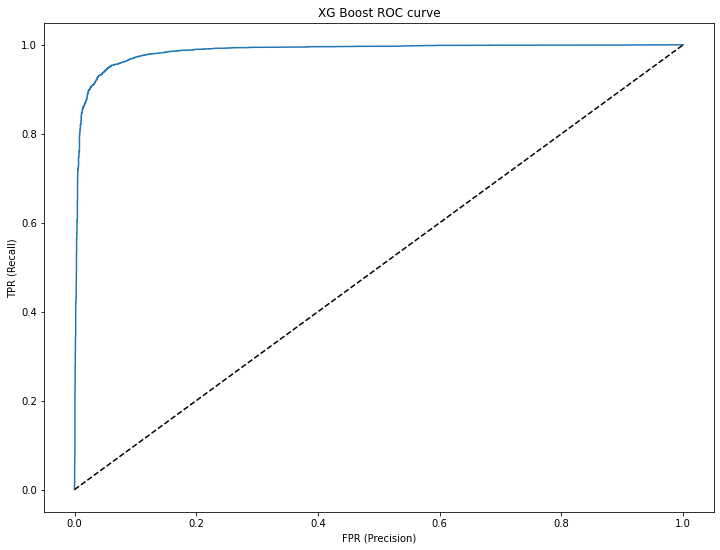

In [119]:
#plot of roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

#title of plot
plt.title('XG Boost ROC curve')

#label
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

#plot
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Evaluation Metrics of XG Boost


In [120]:
#appending values in datafame of evaluation metrics
evaluation_metrics_df=evaluation_metric('XG Boost Classifier', y_test, y_pred, evaluation_metrics_df)
evaluation_metrics_df

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score,Test score,Train score
0,Logistic Regression,0.945231,0.942639,0.946562,0.944596,0.985833,0.945231,0.947439
1,Random Forest Classifier,0.943502,0.935660,0.949535,0.942546,0.983916,0.945231,0.947439
2,Random Forest with GridSearchCV,0.942530,0.931080,0.951839,0.941345,0.983391,0.945231,0.947439
3,XG Boost Classifier,0.945555,0.938713,0.950740,0.944688,0.985964,0.945231,0.947439


##Confusion matrix of XG Boost

[[4449  223]
 [ 281 4304]]


Text(0.5, 1.0, 'XG Boost Classifier')

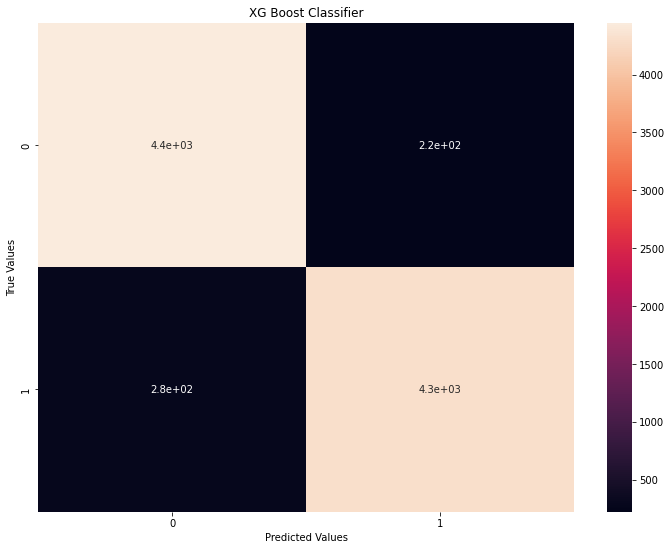

In [121]:
# Get the confusion matrix for both train and test
cm = confusion_matrix(y_test, y_pred)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values')
ax.set_title('XG Boost Classifier')

# 4. K Nearest Neighbour Classifiier

In [122]:
#fitting KNN in training set
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [123]:
#predicted test data.
y_pred = knn.predict(X_test)
y_pred


array([0, 1, 1, ..., 1, 0, 0])

In [124]:
#evalution metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4672
           1       0.94      0.94      0.94      4585

    accuracy                           0.94      9257
   macro avg       0.94      0.94      0.94      9257
weighted avg       0.94      0.94      0.94      9257



##ROC Curve of KNN Classifier

In [125]:
#roc_auc_score
y_pred_proba =knn.predict_proba(X_test)[::,1]
auc_score=roc_auc_score(y_test,y_pred_proba)
auc_score

0.9744539501202552

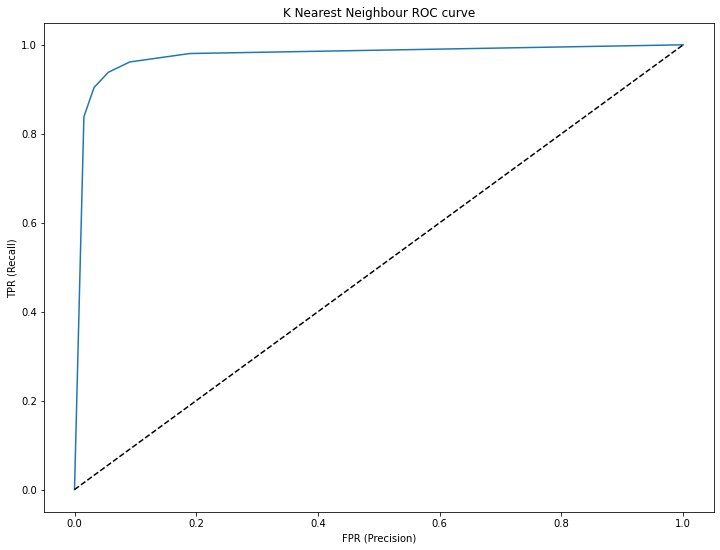

In [126]:
#plot of roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.title('K Nearest Neighbour ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Evaluation Metrics of KNN Classifier



In [127]:
#append values in dataframe
evaluation_metrics_df=evaluation_metric('K Nearest Neighbour Classifier', y_test, y_pred, evaluation_metrics_df)
evaluation_metrics_df

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score,Test score,Train score
0,Logistic Regression,0.945231,0.942639,0.946562,0.944596,0.985833,0.945231,0.947439
1,Random Forest Classifier,0.943502,0.935660,0.949535,0.942546,0.983916,0.945231,0.947439
2,Random Forest with GridSearchCV,0.942530,0.931080,0.951839,0.941345,0.983391,0.945231,0.947439
3,XG Boost Classifier,0.945555,0.938713,0.950740,0.944688,0.985964,0.945231,0.947439
4,K Nearest Neighbour Classifier,0.941342,0.938277,0.943007,0.940636,0.974454,0.945231,0.947439


##Confusion matrix of KNN Classifier

[[4412  260]
 [ 283 4302]]


Text(0.5, 1.0, 'KNN Classifier')

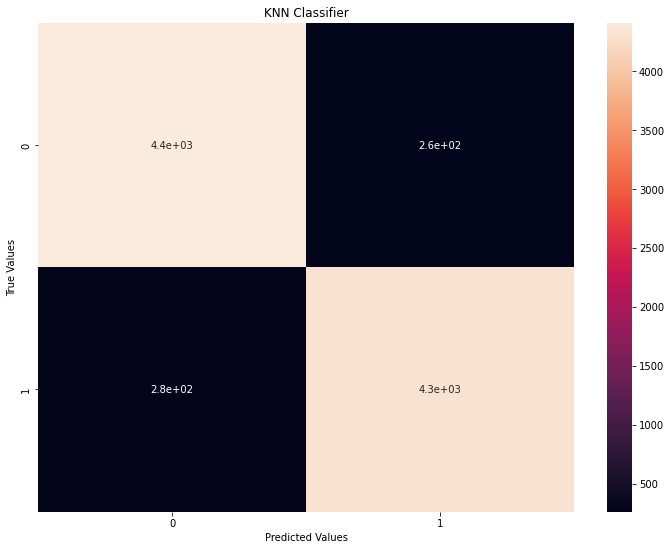

In [128]:
# Get the confusion matrix for both train and test
cm = confusion_matrix(y_test, y_pred)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values')
ax.set_title('KNN Classifier')

#Hyperparameter Tuning of KNN Classifier

In [129]:
#parameters
param_grid = {'n_neighbors':np.arange(10,50,2)}

In [130]:
#fitting values
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48])})

In [131]:
knn_cv.best_params_

{'n_neighbors': 38}

In [132]:
#getting best estimator
knn_cv.best_estimator_

KNeighborsClassifier(n_neighbors=38)

In [133]:
#assigining grid variable
knn_grid_best = knn_cv.best_estimator_

In [134]:
#prediction
y_pred = knn_grid_best.predict(X_test)

In [135]:
#evaluation metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4672
           1       0.95      0.93      0.94      4585

    accuracy                           0.94      9257
   macro avg       0.94      0.94      0.94      9257
weighted avg       0.94      0.94      0.94      9257



##ROC Curve of KNN Classifier after Hyperparameter Tuning

In [136]:
#roc_auc_score
y_pred_proba =knn_grid_best.predict_proba(X_test)[::,1]

auc_score=roc_auc_score(y_test,y_pred_proba)
auc_score

0.9842113764359661

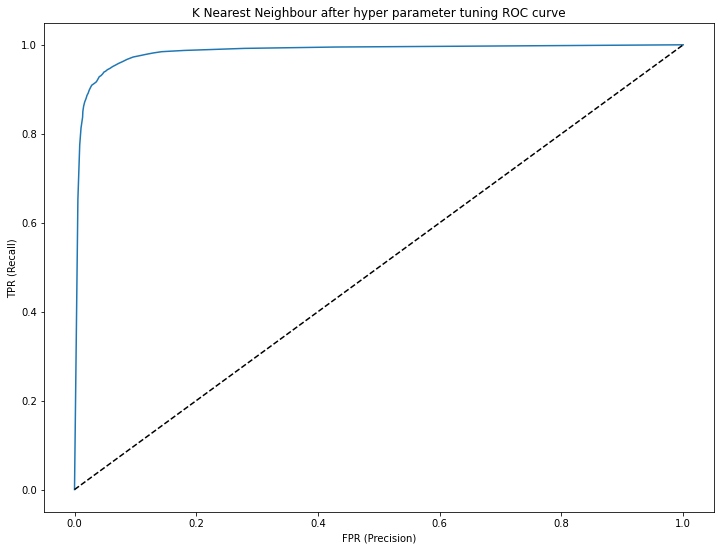

In [137]:
#Plot roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.title('K Nearest Neighbour after hyper parameter tuning ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Evaluation Metrics of KNN Classifier after Hyperparameter Tuning



In [138]:
#append values in dataframe
evaluation_metrics_df=evaluation_metric('K Nearest Neighbour with GridSearchCV', y_test, y_pred, evaluation_metrics_df)
evaluation_metrics_df

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score,Test score,Train score
0,Logistic Regression,0.945231,0.942639,0.946562,0.944596,0.985833,0.945231,0.947439
1,Random Forest Classifier,0.943502,0.935660,0.949535,0.942546,0.983916,0.945231,0.947439
2,Random Forest with GridSearchCV,0.942530,0.931080,0.951839,0.941345,0.983391,0.945231,0.947439
3,XG Boost Classifier,0.945555,0.938713,0.950740,0.944688,0.985964,0.945231,0.947439
4,K Nearest Neighbour Classifier,0.941342,0.938277,0.943007,0.940636,0.974454,0.945231,0.947439
5,K Nearest Neighbour with GridSearchCV,0.944258,0.934569,0.952011,0.943209,0.984211,0.945231,0.947439


##Confusion matrix of KNN Classifier after Hyperprameter Tuning

[[4456  216]
 [ 300 4285]]


Text(0.5, 1.0, 'KNN Classifier after hyperparmeter tuning')

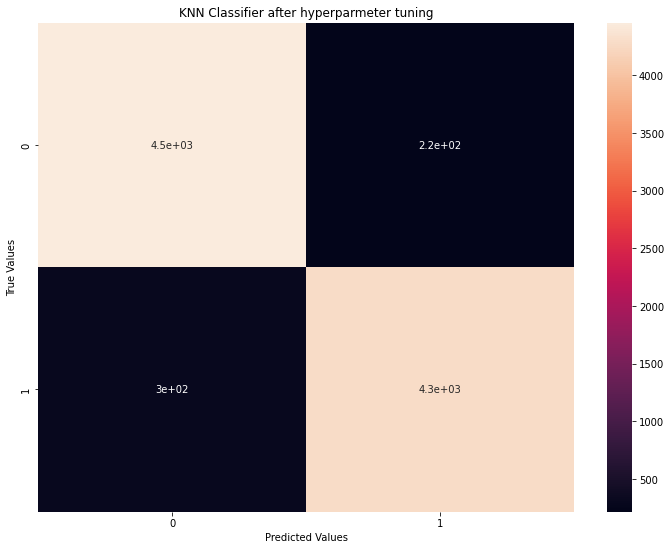

In [139]:
# Get the confusion matrix for both train and test
cm = confusion_matrix(y_test, y_pred)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values')
ax.set_title('KNN Classifier after hyperparmeter tuning')

In [140]:
evaluation_metrics_df

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score,Test score,Train score
0,Logistic Regression,0.945231,0.942639,0.946562,0.944596,0.985833,0.945231,0.947439
1,Random Forest Classifier,0.943502,0.935660,0.949535,0.942546,0.983916,0.945231,0.947439
2,Random Forest with GridSearchCV,0.942530,0.931080,0.951839,0.941345,0.983391,0.945231,0.947439
3,XG Boost Classifier,0.945555,0.938713,0.950740,0.944688,0.985964,0.945231,0.947439
4,K Nearest Neighbour Classifier,0.941342,0.938277,0.943007,0.940636,0.974454,0.945231,0.947439
5,K Nearest Neighbour with GridSearchCV,0.944258,0.934569,0.952011,0.943209,0.984211,0.945231,0.947439


In [141]:
#sort according to higher accuracy
evaluation_metrics_df.sort_values('Accuracy',ascending=False)


,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score,Test score,Train score
3,XG Boost Classifier,0.945555,0.938713,0.950740,0.944688,0.985964,0.945231,0.947439
0,Logistic Regression,0.945231,0.942639,0.946562,0.944596,0.985833,0.945231,0.947439
5,K Nearest Neighbour with GridSearchCV,0.944258,0.934569,0.952011,0.943209,0.984211,0.945231,0.947439
1,Random Forest Classifier,0.943502,0.935660,0.949535,0.942546,0.983916,0.945231,0.947439
2,Random Forest with GridSearchCV,0.942530,0.931080,0.951839,0.941345,0.983391,0.945231,0.947439
4,K Nearest Neighbour Classifier,0.941342,0.938277,0.943007,0.940636,0.974454,0.945231,0.947439


#Conclusion

* 'Overall','food bev','cabin_service','value_for_money' etc are positively correlated with recommendation. these parameters should be improved to provide better service and hence it will improve recommendation chances for airlines. 
* Entertainment has 0.65 of correlation which is less than others.
* 'Overall' is most correlatetd with recommendation. 
* Multicollinearity is present in between overall and value_for_money.
* Xg boost classifier gives better accuracy.
* XG Boost, Logistic Regression gives good results in terms of accuracy. The highest accuracy obtained is 0.9455 with KNN with grid search CV. 
* KNN after applying hyperparameter tuning also gave good accuracy.
* American airlines,united airlines,spirit and British airlines received maximum 'NO' recommendations.
* China southern airlines, Lufthansa  and Qatar airways received maximum 'YES' recommendations. Thai smile, Tunisair, Air arabia, adria airways received minimum 'Yes' recommendations.
* For Economy class, Number of 'NO' recommendations are more than 'YES' recommendations.
* For business class and first class, Number of 'YES' recommendations are more than 'NO' recommendations.

* For Premium economy class number of 'YES' recommendation and 'NO' recommendations are approximately equal.